<h1>Unit 12 Live Session </center> </h1>
<h3> W203 Instructional Team </h3>

#### Multivariate Linear Regression, Inference
<center>![title](hypothesis_1.jpg)</center>

<h3> Class Announcements </h3>
1. Peer Review Distribution
2. HW
3. Packages
<ul>
<li> conda install -c r r-car
<li> conda install -c r r-lmtest
<li> conda install -c r r-sandwich
<li> conda install -c r r-stargazer
</ul>

#### 1.0 Useful functions in R:

Code    |    Function 
--------------------------|---------------------------------------------------------------------
coefficients(fit) | Extract model coefficients
fitted(fit)       | Extract predicted values
residuals(fit)    | Extract resduals
vcovHC(fit)       | Extract heteroskedasticity-robust covariance matrix
coeftest(fit, vcov = vcovHC) | Conduct hypothesis test with heteroskedasticity-robust standard errors
confint(fit, level=0.95)| Calculate non-robust CIs for model parameters (at 95%) 

**Note:** For heteroskedasticity-robust confidence intervals, get the variance of each coefficient from vcovHC, take the square root to get the standard error, get the proper t critical values from qt, and construct manually.

<h3> 2 Variance of OLS Estimators </h3>

Recall (one of) the expression(s) for the variance of each OLS slope coefficient:

$$var(\hat{\beta_j}) = \frac{\sigma^2}{SST_j (1-R_j^2)}$$

<h4> A Crappy Analogy </h4>

Sometimes when you are (re)learning linear regression it is helpful to think in terms of analogies, so here goes... 

Imagine that you have gone to popular club late on a friday night with two friends Alex and Bob. You find yourself a table and sit down close to the dance floor. This would be the perfect opportunity for you to try out the new shopping cart dance move you have been practicing in front of your dog all week but its been a long night and the three of you only want to talk.

Your conversation starts but you are having trouble following the conversation for two distinct reasons. 

1. You are having trouble distiguishing the voices of your friends from the overall noise in the club. 

2. The lights are flashing in such a way that the faces of your friends are in total darkness most of the time, as a result even when you can distinguish between the background club noises and your friends you are having trouble distinguishing Alex's voice from Bob's. 

The background noise in the club is analagous to the error term $u$ of the regression,

$$ Y = \beta_0 + \beta_1X_1 + \beta_2X_2 + u $$

$X_1$ and $X_2$ are the variation of $Y$ (the sound in the club) due to Alex and Bob respectively, $u$ is the variation in your outcome $Y$ (sound in the club) which is just uninteresting noise. 

In this context regression is an attempt to distinguish the variation in $Y$ (sound in the club) due to regressors $X_1$ and $X_2$, (Alex and Bob respectively) from $u$,which is just uninteresting noise (Boots and Pants, "it's getting hot in here so ....", " Yeah, yeah, ... ", " oh my good she is such a ...."). 

Regression is also an attempt to distinguish the variation in $Y$ (sound in the club) due to $X_1$ (Alex) from the variation in $Y$ due to $X_2$ (Bob).

<a href="https://imgflip.com/i/2ekbxi"><img src="https://i.imgflip.com/2ekbxi.jpg" title="made at imgflip.com"/></a>

** 2.1 ** Why is it desirable to have a small variance for each estimated coefficient? 

If your variance for $\hat{\beta}$ is too large, you would lose precision on your slope coefficient. Also it's easier to reject your null hypothesis if your variance is small.

** 2.2 **  For each component of this equation, explain (1) what it means, and (2) why it moves the standard error of $\beta_j$ up or down. Try to explain it in terms of the analogy we have constructed.

* $\sigma^2$
* $SST_j$
* $R_j^2$

$$var(\hat{\beta_j}) = \frac{\sigma^2}{SST_j (1-R_j^2)}$$

$\sigma^2 = var(u)$ The more the error varies, the more noise theres is to throw off the estimate, so the variance would increase. Directly correlated to the variance of the estimated coefficient.

$SST_j = \sum_{j=1}^{n} (x_j - \bar{x})^2$ Total Sum of Squares. The more variation in $x_j$, the more precise the estimated coefficient.

$R_j^2 = \frac{SSE}{SST} = \frac{\sum_{j=1}^{n} (\hat{x_j} - \bar{x})^2}{\sum_{j=1}^{n} (x_j - \bar{x})^2}$ The smaller the $R_j^2$, the larger the variance of $\hat{\beta_j}$  Therefore, you want a larger $R_j^2$

Component 3 has a special name: the Variance Inflation Factor.  You can find the variance inflation factor for each variable in a linear model using the vif function in the car package.  Interpreting VIFs depends very much on context, but a VIF of 10 would usually be considered very high.

To get the variance of each coefficient in R, we would typically get the diagonal elements of the robust covariance matrix, diag(vcovHC(model))

To get the standard error of a coefficient, take the square root of the variance.

<h3> 3 R Exercise </h3>

In this analysis, we will use the mtcars dataset which is a dataset that was extracted from the 1974 Motor Trend US magazine, and comprises fuel consumption and 10 aspects of automobile design and performance for 32 automobiles (1973-74 models). The dataset is automatically available when you start R.  For more information about the dataset, use the R command: help(mtcars)

In [21]:
library(car)
#library(lmtest)
#library(sandwich)
#library(stargazer)

** 3.1 ** Using the mtcars data, run a multiple linear regression to find the effect of displacement (disp), gross horsepower (hp), weight (wt), and rear axle ratio (drat) on the miles per gallon (mpg).

In [24]:
model <- lm(mpg~disp+hp+wt+drat, data = mtcars)
model$coefficients
summary(model)$r.squared

(Intercept)         disp           hp           wt         drat 
29.148737553  0.003815241 -0.034783534 -3.479667528  1.768048769

[1] 0.8376289

** 3.2: ** For ** each ** of the following 6 CLM assumptions, assess whether the assumption holds.  Where possible, demonstrate multiple ways of assessing an assumption.  When an assumption appears violated, state what steps you would take in response.

1. Linear population model
2. Random Sampling
3. No perfect multicollinearity
4. Zero-conditional mean
5. Homoskedasticity
6. Normality of Errors

1) We are forcing the population model to be linear

2) The random sampling would depend on the mtcars data set. They picked 32 automobile models but they don't say how they picked these 32 models. It does not seem like the sampling is completely random. Maybe the magazine has business ties to a company like mercedes.

[1] 0.7909486

[1] 0.8879799

[1] -0.7102139

[1] 0.6587479

[1] -0.4487591

[1] -0.7124406

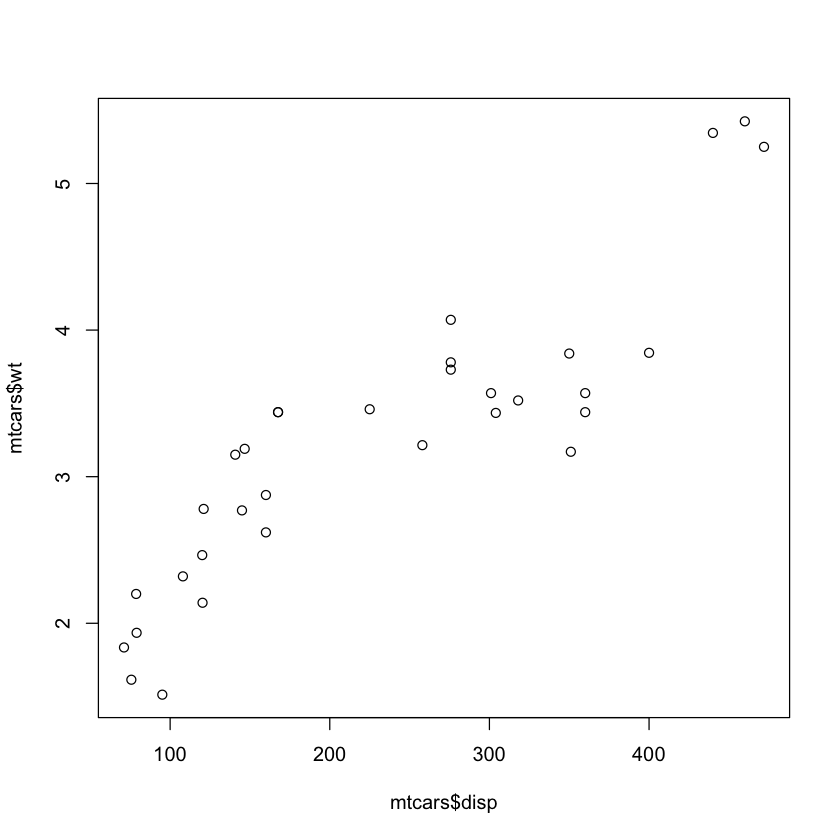

In [40]:
#3)
cor(mtcars$disp, mtcars$hp)
cor(mtcars$disp, mtcars$wt)
cor(mtcars$disp, mtcars$drat)
cor(mtcars$hp, mtcars$wt)
cor(mtcars$hp, mtcars$drat)
cor(mtcars$wt, mtcars$drat)
#cor(mtcars)
plot(mtcars$disp, mtcars$wt)

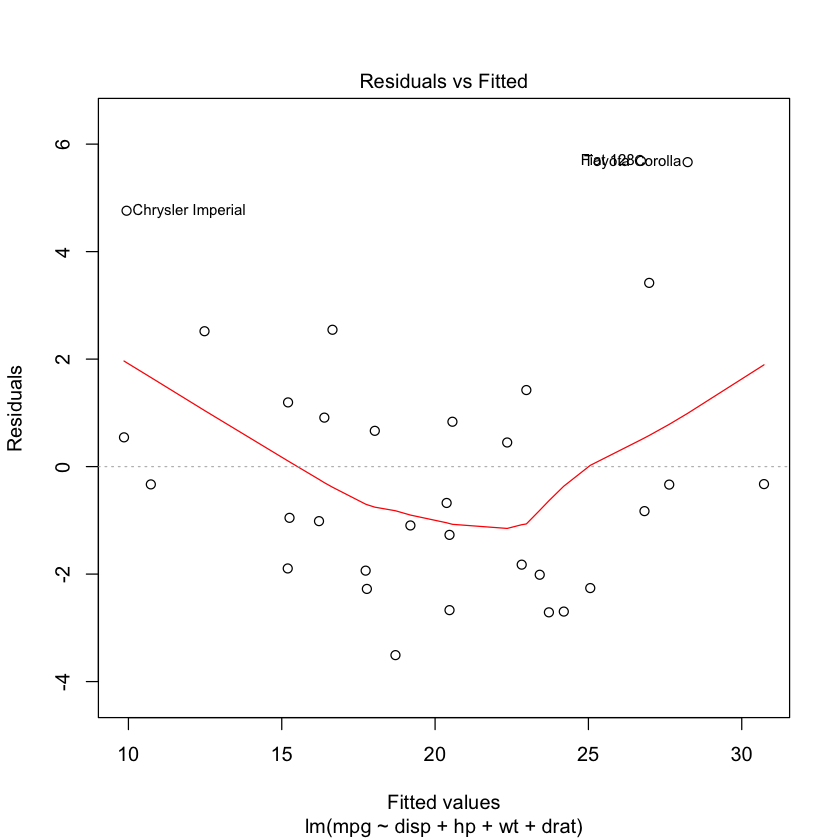

In [42]:
#4)
plot(model,1)
# clear bias between residuals and independent variables

### ** 3.3 ** In addition to the above, assess to what extent (imperfect) multicollinearity is affecting your inference.

** 3.4 ** Interpret your slope coefficients, and note which ones are significantly different from zero.  Whether or not you detected heteroskedasticity above, be conservative in this step and use robust standard errors.

**3.5** How does the log transform affect which CLM assumptions hold.

** 3.6 ** Which model has a better fit.

** 3.7 ** (As time allows) Report the results of both models in a nicely formatted regression table.

<h3> 4 More about Multicollinearity </h3>

A common problem with multivariate regression is collinearity.
If two or more predictor variables are highly correlated, and they are both entered into a regression model, it increases the standard error of each one and you get very unstable estimates of the slope. We usually assess the collinearity by variance inflation factor (VIF). 

#### 4.1 Ways to Detect Multicollinearity 

We begin by regressing a particular independent variable on all other independent variables.

1. As the squared correlation (r2) increases toward 1.0, the magnitude of potential problems associated with multicollinearity increases correspondingly. 

2. Tolerance (1-R2) One minus the squared multiple correlation of a given IV from other Ivs in the equation. Tolerance values of 0.10 or less Indicate that there may be serious multicollinearity. 

3. The Variance Inflation Factor [VIF=1/(1-R2)] VIF Is the reciprocal of the Tolerance. Any VIF of 10 or more provides evidence of serious multicollinearity. 

4. Condition Number (k) The square root of the ratio of the largest eigenvalue to the smallest eigenvalue. k of 30 or larger indicate that there may be serious multicollinearity.